# Magnificent 7 LEAP Strategy Comparison

This notebook tests LEAP strategies across the Magnificent 7 tech stocks (GOOGL, MSFT, AAPL, NVDA, META, AMZN, TSLA) with different strike factors.

## Strategy Import
The LEAP strategy is imported from `strategies/leap_strategy.py`, making it reusable across all notebooks.

## Parameters Tested
- **Strike Factors**: 0.9 (10% ITM), 1.0 (ATM), 1.1 (10% OTM)
- **LEAP Duration**: 365 days (1 year)
- **Roll Threshold**: 90 days before expiration

In [9]:
import pandas as pd
import numpy as np
import sys
sys.path.insert(0, "../..")

from utils.simulation import BacktestSimulation
from strategies.leap_strategy import create_leap_strategy
from datetime import datetime

# Configuration
tickers = ["GOOGL", "MSFT", "AAPL", "NVDA", "META", "AMZN", "TSLA"]  # Mag 7
strike_factors = [0.9, 1.0, 1.1]  # 10% ITM, ATM, 10% OTM
interest_rate = 0.05
days = 365
roll_threshold = 90

start = datetime(2024, 1, 1)
end = datetime(2024, 12, 31)
initial_cash = 10000

In [10]:
# Run simulations for all ticker/strike_factor combinations
results = []

print(f"Testing {len(tickers)} tickers × {len(strike_factors)} strike factors = {len(tickers) * len(strike_factors)} combinations\n")

for ticker in tickers:
    for strike_factor in strike_factors:
        print(f"\n{'='*60}")
        print(f"Ticker: {ticker} | Strike Factor: {strike_factor}")
        print('='*60)
        
        try:
            # Create strategy using the imported factory function
            strategy = create_leap_strategy(
                ticker=ticker,
                strike_factor=strike_factor,
                days=days,
                interest_rate=interest_rate,
                roll_threshold=roll_threshold
            )
            
            # Run simulation
            sim = BacktestSimulation(
                tickers=[ticker],
                start_date=start,
                end_date=end,
                initial_cash=initial_cash,
                strategy_callback=strategy
            )
            
            sim.run()
            
            # Get performance metrics
            df = pd.DataFrame(sim.history)
            final_value = df['total_value'].iloc[-1]
            total_return = (final_value / initial_cash - 1) * 100
            
            returns = df['total_value'].pct_change().dropna()
            sharpe = returns.mean() / returns.std() * np.sqrt(252) if len(returns) > 0 and returns.std() > 0 else 0
            max_dd = ((df['total_value'].cummax() - df['total_value']) / df['total_value'].cummax()).max() * 100
            
            sim.print_performance_stats()
            
            # Store results
            results.append({
                'ticker': ticker,
                'strike_factor': strike_factor,
                'final_value': final_value,
                'total_return': total_return,
                'sharpe_ratio': sharpe,
                'max_drawdown': max_dd,
                'num_transactions': len(sim.transactions)
            })
            
        except Exception as e:
            print(f"Error with {ticker} at strike {strike_factor}: {e}")
            results.append({
                'ticker': ticker,
                'strike_factor': strike_factor,
                'final_value': initial_cash,
                'total_return': 0,
                'sharpe_ratio': 0,
                'max_drawdown': 0,
                'num_transactions': 0
            })

# Convert to DataFrame
results_df = pd.DataFrame(results)

print("\n" + "="*80)
print("ALL RESULTS SUMMARY")
print("="*80)
print(results_df.to_string(index=False))

Testing 7 tickers × 3 strike factors = 21 combinations


Ticker: GOOGL | Strike Factor: 0.9
Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $31,628.86
Total Return: 216.29%
Sharpe Ratio: 1.60
Max Drawdown: 60.05%
Annualized Volatility: 105.75%

Ticker: GOOGL | Strike Factor: 1.0
Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $40,087.78
Total Return: 300.88%
Sharpe Ratio: 1.64
Max Drawdown: 70.03%
Annualized Volatility: 139.17%

Ticker: GOOGL | Strike Factor: 1.1
Loading market data...


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)
/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)
/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)


Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $45,922.90
Total Return: 359.23%
Sharpe Ratio: 1.63
Max Drawdown: 80.52%
Annualized Volatility: 181.80%

Ticker: MSFT | Strike Factor: 0.9
Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $13,482.19
Total Return: 34.82%
Sharpe Ratio: 0.83
Max Drawdown: 38.44%
Annualized Volatility: 54.30%

Ticker: MSFT | Strike Factor: 1.0
Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)
/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)
/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)



=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $17,318.87
Total Return: 73.19%
Sharpe Ratio: 1.05
Max Drawdown: 60.29%
Annualized Volatility: 110.49%

Ticker: MSFT | Strike Factor: 1.1
Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $14,714.59
Total Return: 47.15%
Sharpe Ratio: 0.97
Max Drawdown: 71.18%
Annualized Volatility: 137.31%

Ticker: AAPL | Strike Factor: 0.9
Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)
/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)
/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)



=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $28,501.93
Total Return: 185.02%
Sharpe Ratio: 1.50
Max Drawdown: 55.72%
Annualized Volatility: 104.54%

Ticker: AAPL | Strike Factor: 1.0
Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $33,525.64
Total Return: 235.26%
Sharpe Ratio: 1.50
Max Drawdown: 66.82%
Annualized Volatility: 139.39%

Ticker: AAPL | Strike Factor: 1.1
Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $39,987.34
Total Return: 299.87%
Sharpe Ratio: 1.54
Max Drawdown: 82.80%
Annualized Volatility: 221.61%

Ticker: NVDA | Strike Factor: 0.9
Loading market data...


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)
/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)


Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $80,163.36
Total Return: 701.63%
Sharpe Ratio: 2.43
Max Drawdown: 39.04%
Annualized Volatility: 110.34%

Ticker: NVDA | Strike Factor: 1.0
Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $102,194.10
Total Return: 921.94%
Sharpe Ratio: 2.44
Max Drawdown: 43.85%
Annualized Volatility: 127.27%

Ticker: NVDA | Strike Factor: 1.1
Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)
/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)



=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $124,655.09
Total Return: 1146.55%
Sharpe Ratio: 2.40
Max Drawdown: 49.93%
Annualized Volatility: 146.62%

Ticker: META | Strike Factor: 0.9
Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $32,239.83
Total Return: 222.40%
Sharpe Ratio: 1.57
Max Drawdown: 34.28%
Annualized Volatility: 106.07%

Ticker: META | Strike Factor: 1.0
Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $53,799.00
Total Return: 437.99%
Sharpe Ratio: 1.63
Max Drawdown: 43.43%
Annualized Volatility: 165.17%

Ticker: META | Strike Factor: 1.1
Loading market data...


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)
/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)


Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $73,705.76
Total Return: 637.06%
Sharpe Ratio: 1.60
Max Drawdown: 48.87%
Annualized Volatility: 225.49%

Ticker: AMZN | Strike Factor: 0.9
Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $38,082.78
Total Return: 280.83%
Sharpe Ratio: 1.77
Max Drawdown: 50.87%
Annualized Volatility: 107.23%

Ticker: AMZN | Strike Factor: 1.0
Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)
/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)



=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $48,114.13
Total Return: 381.14%
Sharpe Ratio: 1.77
Max Drawdown: 54.65%
Annualized Volatility: 137.06%

Ticker: AMZN | Strike Factor: 1.1
Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $65,773.03
Total Return: 557.73%
Sharpe Ratio: 1.78
Max Drawdown: 60.67%
Annualized Volatility: 189.07%

Ticker: TSLA | Strike Factor: 0.9
Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $23,071.84
Total Return: 130.72%
Sharpe Ratio: 1.16
Max Drawdown: 46.15%
Annualized Volatility: 131.59%

Ticker: TSLA | Strike Factor: 1.0
Loading market data...


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)
/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)
/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)


Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $21,243.77
Total Return: 112.44%
Sharpe Ratio: 1.19
Max Drawdown: 69.66%
Annualized Volatility: 196.83%

Ticker: TSLA | Strike Factor: 1.1
Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $19,538.74
Total Return: 95.39%
Sharpe Ratio: 1.26
Max Drawdown: 76.92%
Annualized Volatility: 248.30%

ALL RESULTS SUMMARY
ticker  strike_factor   final_value  total_return  sharpe_ratio  max_drawdown  num_transactions
 GOOGL            0.9  31628.864647    216.288646      1.599317     60.045931                 3
 GOOGL            1.0  40087.778228    300.877782      1.637482     70.033779                 3
 GOOGL            1.1  45922.902808    359.229028      1.628067     80.520428                 3
  MSFT            0.9  13482.193200     34.82193

/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)


In [11]:
# Run simulations for all ticker/strike_factor combinations
results = []

print(f"Testing {len(tickers)} tickers × {len(strike_factors)} strike factors = {len(tickers) * len(strike_factors)} combinations\n")

for ticker in tickers:
    for strike_factor in strike_factors:
        print(f"\n{'='*60}")
        print(f"Ticker: {ticker} | Strike Factor: {strike_factor}")
        print('='*60)
        
        try:
            # Create strategy with current parameters
            strategy = create_leap_strategy(ticker, strike_factor, days, time, interest_rate)
            
            # Run simulation
            sim = BacktestSimulation(
                tickers=[ticker],
                start_date=start,
                end_date=end,
                initial_cash=initial_cash,
                strategy_callback=strategy
            )
            
            sim.run()
            
            # Get performance metrics
            df = pd.DataFrame(sim.history)
            final_value = df['total_value'].iloc[-1]
            total_return = (final_value / initial_cash - 1) * 100
            
            returns = df['total_value'].pct_change().dropna()
            sharpe = returns.mean() / returns.std() * np.sqrt(252) if len(returns) > 0 and returns.std() > 0 else 0
            max_dd = ((df['total_value'].cummax() - df['total_value']) / df['total_value'].cummax()).max() * 100
            
            sim.print_performance_stats()
            
            # Store results
            results.append({
                'ticker': ticker,
                'strike_factor': strike_factor,
                'final_value': final_value,
                'total_return': total_return,
                'sharpe_ratio': sharpe,
                'max_drawdown': max_dd,
                'num_transactions': len(sim.transactions)
            })
            
        except Exception as e:
            print(f"Error with {ticker} at strike {strike_factor}: {e}")
            results.append({
                'ticker': ticker,
                'strike_factor': strike_factor,
                'final_value': initial_cash,
                'total_return': 0,
                'sharpe_ratio': 0,
                'max_drawdown': 0,
                'num_transactions': 0
            })

# Convert to DataFrame
results_df = pd.DataFrame(results)

print("\n" + "="*80)
print("ALL RESULTS SUMMARY")
print("="*80)
print(results_df.to_string(index=False))

Testing 7 tickers × 3 strike factors = 21 combinations


Ticker: GOOGL | Strike Factor: 0.9
Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $7,536.12
Total Return: -24.64%
Sharpe Ratio: 1.42
Max Drawdown: 54.37%
Annualized Volatility: 83.56%

Ticker: GOOGL | Strike Factor: 1.0
Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)
/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)



=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $6,669.07
Total Return: -33.31%
Sharpe Ratio: 1.35
Max Drawdown: 57.36%
Annualized Volatility: 89.65%

Ticker: GOOGL | Strike Factor: 1.1
Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $5,802.01
Total Return: -41.98%
Sharpe Ratio: 1.21
Max Drawdown: 56.28%
Annualized Volatility: 92.49%

Ticker: MSFT | Strike Factor: 0.9
Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $10,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%
Annualized Volatility: 0.00%

Ticker: MSFT | Strike Factor: 1.0
Loading market data...


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)
/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)
/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:189: RuntimeWarning: invalid value encountered in scalar divide
  'sharpe_ratio': returns.mean() / returns.std() * np.sqrt(252) if len(returns) > 0 else 0,
/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date,

Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $10,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%
Annualized Volatility: 0.00%

Ticker: MSFT | Strike Factor: 1.1
Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $10,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%
Annualized Volatility: 0.00%

Ticker: AAPL | Strike Factor: 0.9
Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:189: RuntimeWarning: invalid value encountered in scalar divide
  'sharpe_ratio': returns.mean() / returns.std() * np.sqrt(252) if len(returns) > 0 else 0,
/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)
/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:189: RuntimeWarning: invalid value encountered in scalar divide
  'sharpe_ratio': returns.mean() / returns.std() * np.sqrt(252) if len(returns) > 0 else 0,
/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=F


=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $10,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%
Annualized Volatility: 0.00%

Ticker: AAPL | Strike Factor: 1.0
Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $10,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%
Annualized Volatility: 0.00%

Ticker: AAPL | Strike Factor: 1.1
Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $6,833.06
Total Return: -31.67%
Sharpe Ratio: 1.26
Max Drawdown: 92.44%
Annualized Volatility: 165.49%

Ticker: NVDA | Strike Factor: 0.9
Loading market data...


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:189: RuntimeWarning: invalid value encountered in scalar divide
  'sharpe_ratio': returns.mean() / returns.std() * np.sqrt(252) if len(returns) > 0 else 0,
/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)
/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)


Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $28,581.56
Total Return: 185.82%
Sharpe Ratio: 2.75
Max Drawdown: 38.82%
Annualized Volatility: 98.05%

Ticker: NVDA | Strike Factor: 1.0
Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $27,668.87
Total Return: 176.69%
Sharpe Ratio: 2.72
Max Drawdown: 39.82%
Annualized Volatility: 102.79%

Ticker: NVDA | Strike Factor: 1.1
Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)
/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)



=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $26,755.93
Total Return: 167.56%
Sharpe Ratio: 2.66
Max Drawdown: 40.72%
Annualized Volatility: 106.28%

Ticker: META | Strike Factor: 0.9
Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $10,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%
Annualized Volatility: 0.00%

Ticker: META | Strike Factor: 1.0
Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $10,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%
Annualized Volatility: 0.00%

Ticker: META | Strike Factor: 1.1
Loading market data...


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)
/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:189: RuntimeWarning: invalid value encountered in scalar divide
  'sharpe_ratio': returns.mean() / returns.std() * np.sqrt(252) if len(returns) > 0 else 0,
/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)
/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:189: RuntimeWarning: invalid value encountered in scalar divide
  'sharpe_ratio': returns.mean() / returns.std() * np.sqrt(252) if len(returns) > 0 el

Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $10,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%
Annualized Volatility: 0.00%

Ticker: AMZN | Strike Factor: 0.9
Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $8,841.91
Total Return: -11.58%
Sharpe Ratio: 0.80
Max Drawdown: 77.77%
Annualized Volatility: 123.42%

Ticker: AMZN | Strike Factor: 1.0
Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:189: RuntimeWarning: invalid value encountered in scalar divide
  'sharpe_ratio': returns.mean() / returns.std() * np.sqrt(252) if len(returns) > 0 else 0,
/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)
/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)



=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $7,663.73
Total Return: -23.36%
Sharpe Ratio: 1.74
Max Drawdown: 51.60%
Annualized Volatility: 112.39%

Ticker: AMZN | Strike Factor: 1.1
Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $6,716.40
Total Return: -32.84%
Sharpe Ratio: 1.64
Max Drawdown: 47.89%
Annualized Volatility: 116.90%

Ticker: TSLA | Strike Factor: 0.9
Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $28,858.42
Total Return: 188.58%
Sharpe Ratio: 1.50
Max Drawdown: 65.07%
Annualized Volatility: 144.45%

Ticker: TSLA | Strike Factor: 1.0
Loading market data...


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)
/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)
/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)


Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $26,305.31
Total Return: 163.05%
Sharpe Ratio: 1.43
Max Drawdown: 76.57%
Annualized Volatility: 177.77%

Ticker: TSLA | Strike Factor: 1.1
Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $24,335.10
Total Return: 143.35%
Sharpe Ratio: 1.43
Max Drawdown: 82.03%
Annualized Volatility: 211.69%

ALL RESULTS SUMMARY
ticker  strike_factor  final_value  total_return  sharpe_ratio  max_drawdown  num_transactions
 GOOGL            0.9  7536.119300    -24.638807      1.423309     54.370822                 1
 GOOGL            1.0  6669.074154    -33.309258      1.352360     57.360326                 1
 GOOGL            1.1  5802.013588    -41.979864      1.213804     56.278062                 1
  MSFT            0.9 10000.000000      0.000000   

/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)



BEST RESULTS BY TICKER
ticker  strike_factor   final_value  total_return  sharpe_ratio  max_drawdown  num_transactions
  AAPL            1.1  39987.336844    299.873368      1.539300     82.800586                 3
  AMZN            1.1  65773.031089    557.730311      1.778716     60.669338                 3
 GOOGL            1.0  40087.778228    300.877782      1.637482     70.033779                 3
  META            1.0  53799.003132    437.990031      1.633522     43.426296                 3
  MSFT            1.0  17318.869040     73.188690      1.052448     60.290915                 3
  NVDA            1.0 102194.098375    921.940984      2.439870     43.848395                 3
  TSLA            1.1  19538.737736     95.387377      1.260605     76.916484                 3

TOP 10 OVERALL (by Sharpe Ratio)
ticker  strike_factor   final_value  total_return  sharpe_ratio  max_drawdown  num_transactions
  NVDA            1.0 102194.098375    921.940984      2.439870     43.848395 

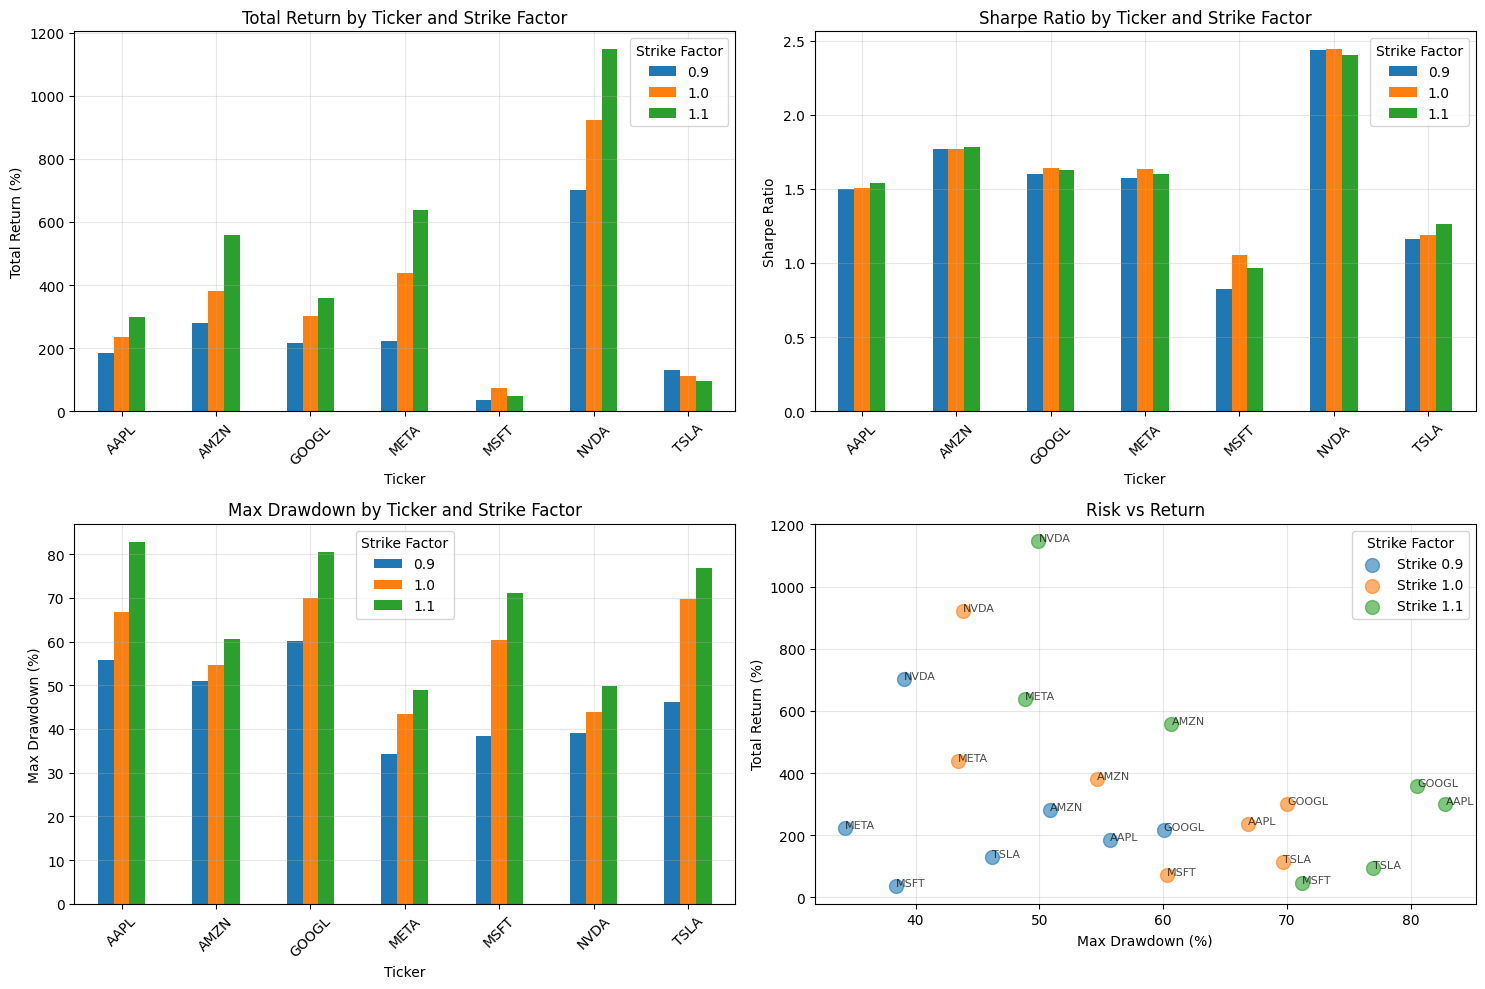

In [8]:
# Analyze results by ticker and strike factor
import matplotlib.pyplot as plt
import numpy as np

print("\n" + "="*80)
print("BEST RESULTS BY TICKER")
print("="*80)
best_by_ticker = results_df.loc[results_df.groupby('ticker')['sharpe_ratio'].idxmax()]
print(best_by_ticker.to_string(index=False))

print("\n" + "="*80)
print("TOP 10 OVERALL (by Sharpe Ratio)")
print("="*80)
print(results_df.sort_values('sharpe_ratio', ascending=False).head(10).to_string(index=False))

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Total Return by Ticker and Strike Factor
pivot_return = results_df.pivot(index='ticker', columns='strike_factor', values='total_return')
pivot_return.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Total Return by Ticker and Strike Factor')
axes[0, 0].set_ylabel('Total Return (%)')
axes[0, 0].set_xlabel('Ticker')
axes[0, 0].legend(title='Strike Factor')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Sharpe Ratio by Ticker and Strike Factor
pivot_sharpe = results_df.pivot(index='ticker', columns='strike_factor', values='sharpe_ratio')
pivot_sharpe.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Sharpe Ratio by Ticker and Strike Factor')
axes[0, 1].set_ylabel('Sharpe Ratio')
axes[0, 1].set_xlabel('Ticker')
axes[0, 1].legend(title='Strike Factor')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Max Drawdown by Ticker
pivot_dd = results_df.pivot(index='ticker', columns='strike_factor', values='max_drawdown')
pivot_dd.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Max Drawdown by Ticker and Strike Factor')
axes[1, 0].set_ylabel('Max Drawdown (%)')
axes[1, 0].set_xlabel('Ticker')
axes[1, 0].legend(title='Strike Factor')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Risk-Return Scatter
for strike_factor in strike_factors:
    subset = results_df[results_df['strike_factor'] == strike_factor]
    axes[1, 1].scatter(subset['max_drawdown'], subset['total_return'], 
                      label=f'Strike {strike_factor}', s=100, alpha=0.6)
    
    # Add ticker labels
    for _, row in subset.iterrows():
        axes[1, 1].annotate(row['ticker'], 
                           (row['max_drawdown'], row['total_return']),
                           fontsize=8, alpha=0.7)

axes[1, 1].set_title('Risk vs Return')
axes[1, 1].set_xlabel('Max Drawdown (%)')
axes[1, 1].set_ylabel('Total Return (%)')
axes[1, 1].legend(title='Strike Factor')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()